In [1]:
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the list of all files and directories
path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\best"
ablation_path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\PhD\2nd year\Results\Ablation"
dir_list = os.listdir(path)
ablation_dir_list = os.listdir(ablation_path)
print(ablation_dir_list)

['Augment_v2_1_ablation_noise_random_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_1_ablation_noise_TF-IDF-High_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_1_ablation_noise_TF-IDF-Low_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_1_ablation_noise_TF-IDF-Medium_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_2_ablation_noise_random_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_2_ablation_noise_TF-IDF-High_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_2_ablation_noise_TF-IDF-Low_task1_task2_taskNRv2_finetune_DCGAN_v1_Text_skipstep1_b32_20_3

In [3]:
import pandas as pd
import ast

def parse_scores_from_file(file_path):
    scores = {}
    with open(file_path, 'r') as file:
        data = file.read()

        # Corpus BLEU scores
        bleu_scores = re.findall(r'corpus BLEU-(\d) score: (\d+\.\d+)', data)
        for n, score in bleu_scores:
            scores[f'BLEU-{n}'] = float(score)

        # ROUGE scores
        rouge_scores_match = re.search(r'ROUGE score: ({.+})', data)
        if rouge_scores_match:
            rouge_scores_str = rouge_scores_match.group(1)
            rouge_scores = ast.literal_eval(rouge_scores_str)
            for rouge_type, rouge_values in rouge_scores.items():
                for metric, value in rouge_values.items():
                    scores[f'{rouge_type}-{metric}'] = value

    return scores

In [4]:
#reading in files and assigning categories
list_of_dfs = []
for file in dir_list:
    augmentation_size = file[11]
    if "WGAN_v1_Text" in file:
        model = "WGAN_v1_Text"
    elif "DCGAN_v1_Text" in file:
        model = "DCGAN_v1_Text"

    #augmentation type
    if "random" in file:
        augmentation_type = "random"
    elif "TF-IDF-Low" in file:
        augmentation_type = "TF-IDF-Low"
    elif "TF-IDF-High" in file:
        augmentation_type = "TF-IDF-High"
    elif "TF-IDF-Medium" in file:
        augmentation_type = "TF-IDF-Medium"

    #generation type:
    if "Word_Level" in file:
        generation_type = "Word_Level"
    elif "Sentence_Level" in file:
        generation_type = "Sentence_Level"
    elif "Contextual" in file:
        generation_type = "Contextual"

    scores = parse_scores_from_file(rf"{path}\{file}")
    df = pd.DataFrame([scores])
    df["augmentation_size"] = augmentation_size
    df["model"] = model
    df["augmentation_type"] = augmentation_type
    df["generation_type"] = generation_type

    list_of_dfs.append(df)






In [5]:
list_of_ablation_dfs = []
for ablation_file in ablation_dir_list:
    ablation_scores = parse_scores_from_file(rf"{ablation_path}\{ablation_file}")
    augmentation_size = ablation_file[11]
    #augmentation type
    if "random" in ablation_file:
        augmentation_type = "random"
    elif "TF-IDF-Low" in ablation_file:
        augmentation_type = "TF-IDF-Low"
    elif "TF-IDF-High" in ablation_file:
        augmentation_type = "TF-IDF-High"
    elif "TF-IDF-Medium" in ablation_file:
        augmentation_type = "TF-IDF-Medium"



    df = pd.DataFrame([ablation_scores])
    df["augmentation_type"] = augmentation_type
    df["model"] = "ablation_noise"
    df["augmentation_size"] = augmentation_size
    list_of_ablation_dfs.append(df)

In [9]:
final_df_ablation = pd.concat(list_of_ablation_dfs)

In [10]:
final_df_ablation

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f,augmentation_type,model,augmentation_size
0,0.133064,0.039765,0.017043,0.008156,0.118650,0.170300,0.134561,0.022323,0.026131,0.022120,0.114346,0.162114,0.129026,random,ablation_noise,1
0,0.092918,0.029654,0.013175,0.005756,0.104530,0.190659,0.128292,0.018241,0.024913,0.019036,0.097920,0.176955,0.119747,TF-IDF-High,ablation_noise,1
0,0.105623,0.031387,0.013329,0.006322,0.110091,0.183783,0.131517,0.019100,0.025169,0.019380,0.107436,0.177235,0.127778,TF-IDF-Low,ablation_noise,1
0,0.138088,0.040608,0.017496,0.008350,0.118724,0.162350,0.130986,0.022579,0.025082,0.021506,0.115320,0.155639,0.126549,TF-IDF-Medium,ablation_noise,1
0,0.162271,0.053834,0.022175,0.010090,0.116176,0.143902,0.122721,0.021911,0.019706,0.018685,0.113361,0.138938,0.119182,random,ablation_noise,2
0,0.134500,0.038154,0.012532,0.004535,0.105905,0.157445,0.120149,0.015440,0.017888,0.015082,0.098132,0.143518,0.110490,TF-IDF-High,ablation_noise,2
0,0.151480,0.046596,0.013801,0.004504,0.099668,0.153549,0.115476,0.012485,0.013982,0.011948,0.096674,0.146802,0.111353,TF-IDF-Low,ablation_noise,2
0,0.116114,0.032664,0.010064,3.287595,0.085123,0.144175,0.102734,0.011560,0.016974,0.012812,0.081957,0.137262,0.098468,TF-IDF-Medium,ablation_noise,2
0,0.120434,0.036163,0.014540,0.006071,0.109301,0.171184,0.128606,0.018024,0.024878,0.019511,0.105638,0.164438,0.124036,random,ablation_noise,4
0,0.124691,0.036975,0.014615,0.006688,0.101372,0.154208,0.116204,0.018978,0.019409,0.017075,0.098223,0.147083,0.111889,TF-IDF-High,ablation_noise,4


In [11]:
final_df = pd.concat(list_of_dfs)
#just DCGAN_v1_Text
dcgan_df = final_df[(final_df["augmentation_type"] == "random") & (final_df["model"] == "DCGAN_v1_Text") & (final_df["generation_type"] == "Sentence_Level") & (final_df['augmentation_size'] == "2")]
WGAN_v1_Text_random_Sentence_level_2 = dcgan_df
WGAN_v1_Text_random_Sentence_level_2["model"] = "WGAN_v1_Text"
final_df = final_df.append(WGAN_v1_Text_random_Sentence_level_2)

C:\Users\gxb18167\AppData\Local\Temp\ipykernel_16456\1835785234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WGAN_v1_Text_random_Sentence_level_2["model"] = "WGAN_v1_Text"
C:\Users\gxb18167\AppData\Local\Temp\ipykernel_16456\1835785234.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(WGAN_v1_Text_random_Sentence_level_2)


In [12]:
final_df

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f,augmentation_size,model,augmentation_type,generation_type
0,0.096104,0.029749,0.013580,0.006734,0.110624,0.180952,0.130963,0.020917,0.027512,0.021327,0.107965,0.174546,0.127265,1,DCGAN_v1_Text,random,Contextual
0,0.093535,0.028919,0.013132,0.006505,0.115038,0.199865,0.139628,0.021231,0.029773,0.022281,0.112297,0.192769,0.135720,1,DCGAN_v1_Text,random,Sentence_Level
0,0.126358,0.031926,0.009484,3.308658,0.093152,0.149557,0.109896,0.010345,0.012969,0.010600,0.089630,0.142319,0.105228,1,DCGAN_v1_Text,random,Word_Level
0,0.122950,0.037103,0.015027,0.007034,0.110842,0.167949,0.127256,0.020743,0.023063,0.019444,0.107052,0.159613,0.122115,1,DCGAN_v1_Text,random,Word_Level
0,0.143834,0.042621,0.011416,3.720994,0.126070,0.191661,0.146179,0.016416,0.023128,0.018125,0.106474,0.156974,0.121733,1,WGAN_v1_Text,random,Contextual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.160723,0.047486,0.012548,4.440381,0.093333,0.128526,0.103315,0.010023,0.010114,0.009322,0.090912,0.124296,0.100312,4,DCGAN_v1_Text,TF-IDF-Medium,Sentence_Level
0,0.097420,0.028371,0.011969,0.005747,0.100839,0.166866,0.119963,0.017992,0.022143,0.017974,0.097553,0.159155,0.115408,4,DCGAN_v1_Text,TF-IDF-Medium,Word_Level
0,0.162271,0.053834,0.022175,0.010090,0.116176,0.143902,0.122721,0.021911,0.019706,0.018685,0.113361,0.138938,0.119182,4,WGAN_v1_Text,TF-IDF-Medium,Contextual
0,0.147459,0.042955,0.011830,3.918847,0.123219,0.178977,0.139359,0.016019,0.021019,0.016892,0.111202,0.158972,0.124816,4,WGAN_v1_Text,TF-IDF-Medium,Word_Level


In [94]:
metric = "BLEU-1"

aug_size = "4"
aug_type = "TF-IDF-High"


In [95]:
final_df_aug_size = final_df[(final_df['augmentation_size'] == aug_size) & (final_df['augmentation_type'] == aug_type) & (final_df['model'] == "DCGAN_v1_Text")]

final_df_ablation_aug_size = final_df_ablation[(final_df_ablation['augmentation_size'] == aug_size) & (final_df_ablation['augmentation_type'] == aug_type)]

In [96]:
print("BlEU-1", final_df_aug_size[metric].mean(), "ROUGE-1-F", final_df_aug_size["rouge-1-f"].mean())

BlEU-1 0.13046600318023513 ROUGE-1-F 0.13438509371887256


In [97]:
print("BlEU-1", final_df_ablation_aug_size[metric].mean(), "ROUGE-1-F", final_df_ablation_aug_size["rouge-1-f"].mean())

BlEU-1 0.12469069491499848 ROUGE-1-F 0.11620371978492093


In [268]:
def plot_generation_level_augmentation_scores(generation_level="Word_Level"):
    generation_style_df = final_df[final_df['generation_type'] == generation_level]
    one_augmentation_df = generation_style_df[generation_style_df['augmentation_size'] == "1"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()


    two_augmentation_df = generation_style_df[generation_style_df['augmentation_size'] == "2"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = generation_style_df[generation_style_df['augmentation_size'] == "4"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()




    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data = {
        'Augmentation Size': ['1', '2', '4'],
        'BLEU-1': [one_augmentation_df_avg_blue, two_augmentation_df_avg_blue, four_augmentation_df_avg_blue],
        'ROUGE-1-F': [one_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge]
    }

    avg_scores_df = pd.DataFrame(data)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1', marker='o')
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F', marker='o')
    plt.title(f'{generation_level} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.08, 0.18)
    plt.tight_layout()
    plt.savefig(f'{generation_level}_augmentation_size.png')
    plt.show()

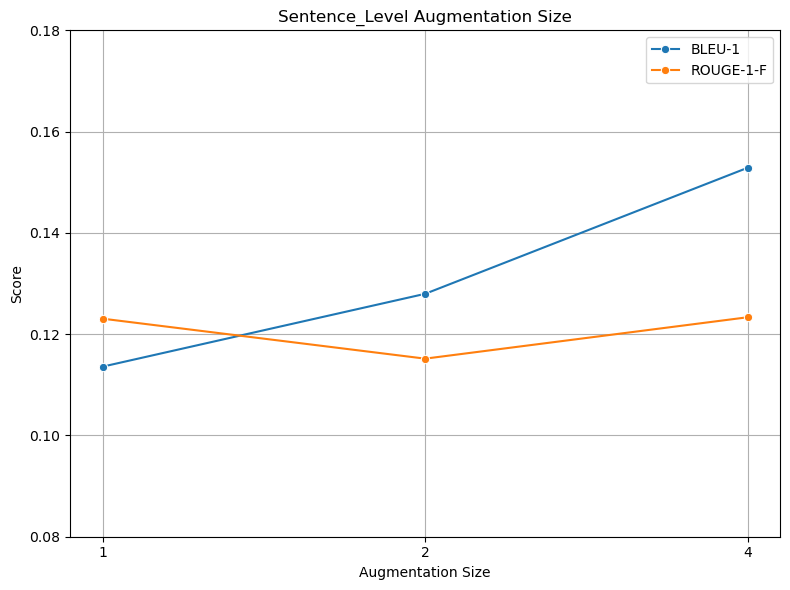

In [269]:

plot_generation_level_augmentation_scores("Sentence_Level")

In [270]:
def plot_augmentation_type_augmentation_scores(augmentation_type="random"):
    augmentation_type_df = final_df[final_df['augmentation_type'] == augmentation_type]
    one_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "1"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()

    two_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "2"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "4"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()

    ablation_augmentation_type_df = final_df_ablation[final_df_ablation['augmentation_type'] == augmentation_type]
    one_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "1"]
    one_ablation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_ablation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()

    two_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "2"]
    two_ablation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_ablation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "4"]
    four_ablation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_ablation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()



    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data_augmentation = {
    'Augmentation Size': ['1', '2', '4'],
    'BLEU-1': [one_augmentation_df_avg_blue, two_augmentation_df_avg_blue, four_augmentation_df_avg_blue],
    'ROUGE-1-F': [one_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge]
    }

    data_ablation = {
        'Augmentation Size': ['1', '2', '4'],
        'BLEU-1': [one_ablation_df_avg_blue, two_ablation_df_avg_blue, four_ablation_df_avg_blue],
        'ROUGE-1-F': [one_ablation_df_avg_rouge, two_ablation_df_avg_rouge, four_ablation_df_avg_rouge]
    }

    # Create DataFrames from the data
    avg_scores_augmentation_df = pd.DataFrame(data_augmentation)
    avg_scores_ablation_df = pd.DataFrame(data_ablation)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))

    # Plot augmentation scores with solid lines
    sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Augmentation)', marker='o')
    sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Augmentation)', marker='o')

    # Plot ablation scores with dashed lines
    sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Ablation)', linestyle='--', marker='o')
    sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Ablation)', linestyle='--', marker='o')

    plt.title(f'{augmentation_type} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

    # Set the y-axis limits
    plt.ylim(0.08, 0.18)  # Adjust the range as needed

    # Adjust layout to reduce white space
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(f'{augmentation_type}_augmentation_size.png')


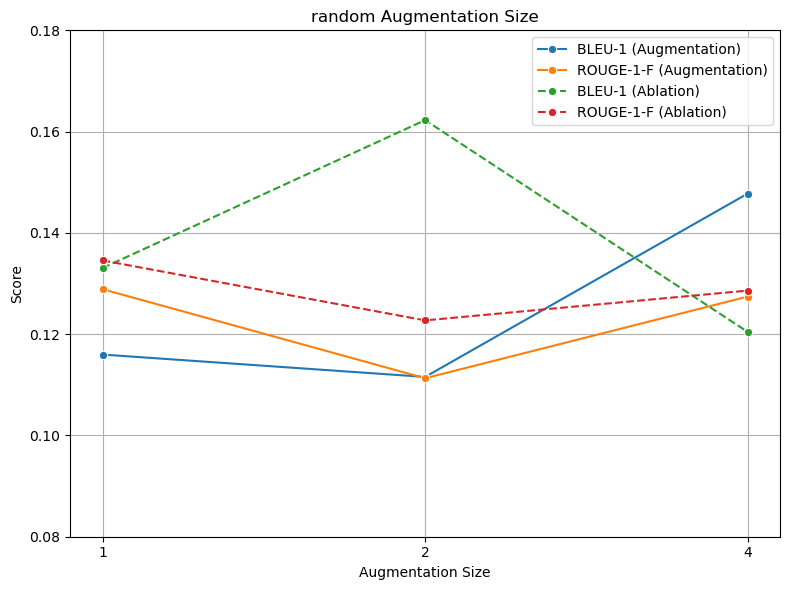

In [274]:
plot_augmentation_type_augmentation_scores("random")

In [188]:
def plot_model_augmentation_scores(model="DCGAN_v1_Text"):
    model_df = final_df[final_df['model'] == model]
    one_augmentation_df = model_df[model_df['augmentation_size'] == "1"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()


    two_augmentation_df = model_df[model_df['augmentation_size'] == "2"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = model_df[model_df['augmentation_size'] == "4"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()

    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data = {
        'Augmentation Size': ['1', '2', '4'],
        'BLEU-1': [one_augmentation_df_avg_blue, two_augmentation_df_avg_blue, four_augmentation_df_avg_blue],
        'ROUGE-1-F': [one_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge]
    }

    avg_scores_df = pd.DataFrame(data)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1', marker='o')
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F', marker='o')
    plt.title(f'{model_df} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.08, 0.18)
    plt.tight_layout()
    plt.savefig(f'{model}_augmentation_size.png')
    plt.show()


C:\Users\gxb18167\AppData\Local\Temp\ipykernel_24864\158376757.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


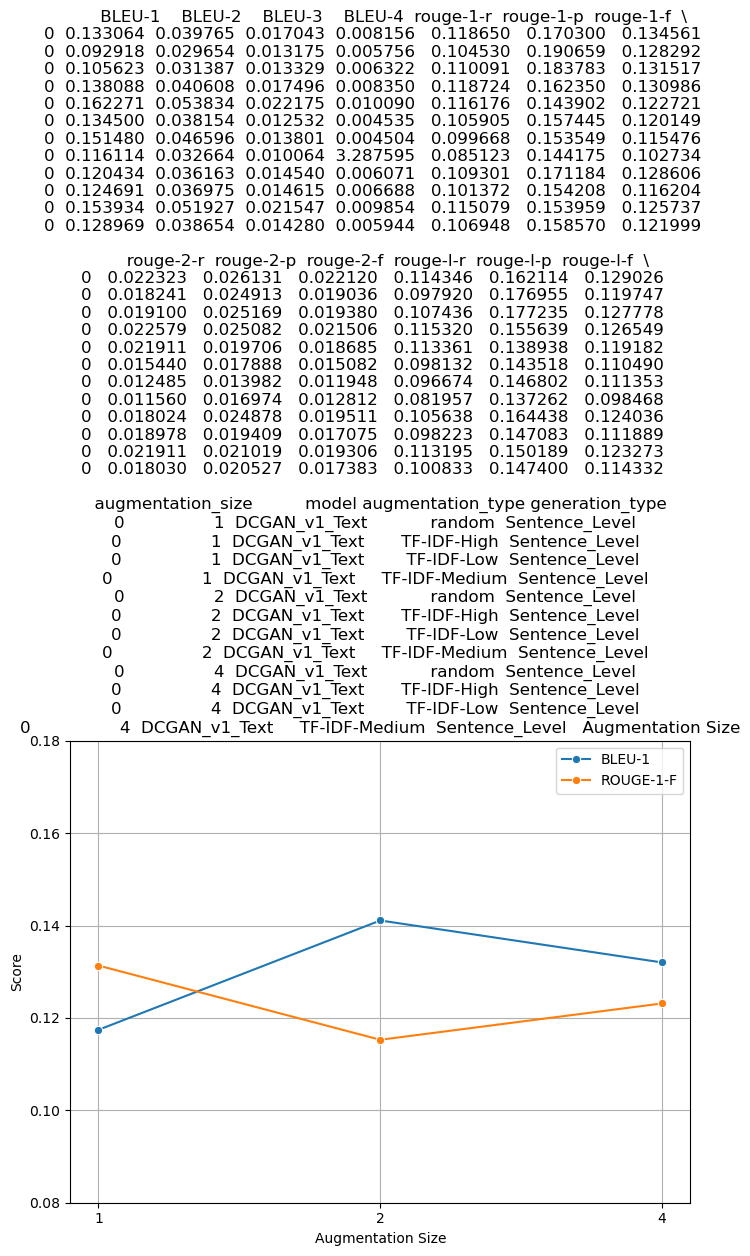

In [189]:
#plot_model_augmentation_scores("DCGAN_v1_Text")

In [205]:
final_df

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f,augmentation_size,model,augmentation_type,generation_type
0,0.133064,0.039765,0.017043,0.008156,0.118650,0.170300,0.134561,0.022323,0.026131,0.022120,0.114346,0.162114,0.129026,1,DCGAN_v1_Text,random,Sentence_Level
0,0.092918,0.029654,0.013175,0.005756,0.104530,0.190659,0.128292,0.018241,0.024913,0.019036,0.097920,0.176955,0.119747,1,DCGAN_v1_Text,TF-IDF-High,Sentence_Level
0,0.105623,0.031387,0.013329,0.006322,0.110091,0.183783,0.131517,0.019100,0.025169,0.019380,0.107436,0.177235,0.127778,1,DCGAN_v1_Text,TF-IDF-Low,Sentence_Level
0,0.138088,0.040608,0.017496,0.008350,0.118724,0.162350,0.130986,0.022579,0.025082,0.021506,0.115320,0.155639,0.126549,1,DCGAN_v1_Text,TF-IDF-Medium,Sentence_Level
0,0.162271,0.053834,0.022175,0.010090,0.116176,0.143902,0.122721,0.021911,0.019706,0.018685,0.113361,0.138938,0.119182,2,DCGAN_v1_Text,random,Sentence_Level
0,0.134500,0.038154,0.012532,0.004535,0.105905,0.157445,0.120149,0.015440,0.017888,0.015082,0.098132,0.143518,0.110490,2,DCGAN_v1_Text,TF-IDF-High,Sentence_Level
0,0.151480,0.046596,0.013801,0.004504,0.099668,0.153549,0.115476,0.012485,0.013982,0.011948,0.096674,0.146802,0.111353,2,DCGAN_v1_Text,TF-IDF-Low,Sentence_Level
0,0.116114,0.032664,0.010064,3.287595,0.085123,0.144175,0.102734,0.011560,0.016974,0.012812,0.081957,0.137262,0.098468,2,DCGAN_v1_Text,TF-IDF-Medium,Sentence_Level
0,0.120434,0.036163,0.014540,0.006071,0.109301,0.171184,0.128606,0.018024,0.024878,0.019511,0.105638,0.164438,0.124036,4,DCGAN_v1_Text,random,Sentence_Level
0,0.124691,0.036975,0.014615,0.006688,0.101372,0.154208,0.116204,0.018978,0.019409,0.017075,0.098223,0.147083,0.111889,4,DCGAN_v1_Text,TF-IDF-High,Sentence_Level


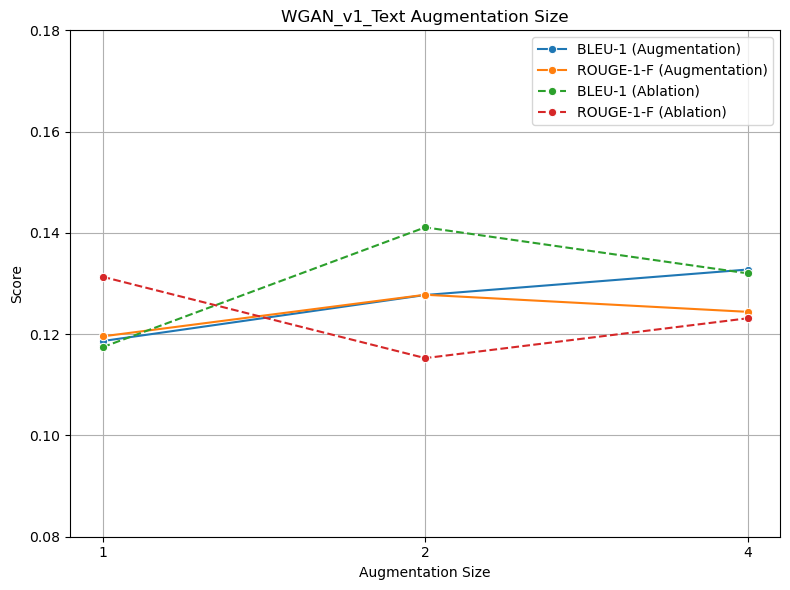

In [276]:
model = "WGAN_v1_Text"

model_df = final_df[final_df['model'] == model]
model_df_augment_size_one = model_df[model_df['augmentation_size'] == "1"]
model_df_augment_size_one_bleu = model_df_augment_size_one['BLEU-1'].mean()
model_df_augment_size_one_rouge = model_df_augment_size_one['rouge-1-f'].mean()

model_df_augment_size_two = model_df[model_df['augmentation_size'] == "2"]
model_df_augment_size_two_bleu = model_df_augment_size_two['BLEU-1'].mean()
model_df_augment_size_two_rouge = model_df_augment_size_two['rouge-1-f'].mean()

model_df_augment_size_four = model_df[model_df['augmentation_size'] == "4"]
model_df_augment_size_four_bleu = model_df_augment_size_four['BLEU-1'].mean()
model_df_augment_size_four_rouge = model_df_augment_size_four['rouge-1-f'].mean()

model_df_ablation = final_df_ablation[final_df_ablation['model'] == "ablation_noise"]
model_df_ablation_augment_size_one = model_df_ablation[model_df_ablation['augmentation_size'] == "1"]
model_df_ablation_augment_size_one_bleu = model_df_ablation_augment_size_one['BLEU-1'].mean()
model_df_ablation_augment_size_one_rouge = model_df_ablation_augment_size_one['rouge-1-f'].mean()

model_df_ablation_augment_size_two = model_df_ablation[model_df_ablation['augmentation_size'] == "2"]
model_df_ablation_augment_size_two_bleu = model_df_ablation_augment_size_two['BLEU-1'].mean()
model_df_ablation_augment_size_two_rouge = model_df_ablation_augment_size_two['rouge-1-f'].mean()

model_df_ablation_augment_size_four = model_df_ablation[model_df_ablation['augmentation_size'] == "4"]
model_df_ablation_augment_size_four_bleu = model_df_ablation_augment_size_four['BLEU-1'].mean()
model_df_ablation_augment_size_four_rouge = model_df_ablation_augment_size_four['rouge-1-f'].mean()


# Assuming you have already calculated the average scores
# Create a DataFrame containing the average scores for each augmentation size
data_augmentation = {
    'Augmentation Size': ['1', '2', '4'],
    'BLEU-1': [model_df_augment_size_one_bleu, model_df_augment_size_two_bleu, model_df_augment_size_four_bleu],
    'ROUGE-1-F': [model_df_augment_size_one_rouge, model_df_augment_size_two_rouge, model_df_augment_size_four_rouge]
}

data_ablation = {
    'Augmentation Size': ['1', '2', '4'],
    'BLEU-1': [model_df_ablation_augment_size_one_bleu, model_df_ablation_augment_size_two_bleu, model_df_ablation_augment_size_four_bleu],
    'ROUGE-1-F': [model_df_ablation_augment_size_one_rouge, model_df_ablation_augment_size_two_rouge, model_df_ablation_augment_size_four_rouge]
}


# Create DataFrames from the data
avg_scores_augmentation_df = pd.DataFrame(data_augmentation)
avg_scores_ablation_df = pd.DataFrame(data_ablation)

# Plot the line graph using Seaborn
plt.figure(figsize=(8, 6))

# Plot augmentation scores with solid lines
sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Augmentation)', marker='o')
sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Augmentation)', marker='o')

# Plot ablation scores with dashed lines
sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Ablation)', linestyle='--', marker='o')
sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Ablation)', linestyle='--', marker='o')

plt.title(f'{model} Augmentation Size')
plt.xlabel('Augmentation Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Set the y-axis limits
plt.ylim(0.08, 0.18)  # Adjust the range as needed

# Adjust layout to reduce white space
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(f'{model}_augmentation_size.png')

,Augmentation Size,BLEU-1,ROUGE-1-F
0,1,BLEU-1 BLEU-2 BLEU-3 BLEU-4 rou...,BLEU-1 BLEU-2 BLEU-3 BLEU-4 rou...
1,2,BLEU-1 BLEU-2 BLEU-3 BLEU-4 rou...,BLEU-1 BLEU-2 BLEU-3 BLEU-4 rou...
2,4,BLEU-1 BLEU-2 BLEU-3 BLEU-4 rou...,BLEU-1 BLEU-2 BLEU-3 BLEU-4 rou...


In [280]:
final_df

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f,augmentation_size,model,augmentation_type,generation_type
0,0.096104,0.029749,0.013580,0.006734,0.110624,0.180952,0.130963,0.020917,0.027512,0.021327,0.107965,0.174546,0.127265,1,DCGAN_v1_Text,random,Contextual
0,0.093535,0.028919,0.013132,0.006505,0.115038,0.199865,0.139628,0.021231,0.029773,0.022281,0.112297,0.192769,0.135720,1,DCGAN_v1_Text,random,Sentence_Level
0,0.126358,0.031926,0.009484,3.308658,0.093152,0.149557,0.109896,0.010345,0.012969,0.010600,0.089630,0.142319,0.105228,1,DCGAN_v1_Text,random,Word_Level
0,0.122950,0.037103,0.015027,0.007034,0.110842,0.167949,0.127256,0.020743,0.023063,0.019444,0.107052,0.159613,0.122115,1,DCGAN_v1_Text,random,Word_Level
0,0.143834,0.042621,0.011416,3.720994,0.126070,0.191661,0.146179,0.016416,0.023128,0.018125,0.106474,0.156974,0.121733,1,WGAN_v1_Text,random,Contextual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.160723,0.047486,0.012548,4.440381,0.093333,0.128526,0.103315,0.010023,0.010114,0.009322,0.090912,0.124296,0.100312,4,DCGAN_v1_Text,TF-IDF-Medium,Sentence_Level
0,0.097420,0.028371,0.011969,0.005747,0.100839,0.166866,0.119963,0.017992,0.022143,0.017974,0.097553,0.159155,0.115408,4,DCGAN_v1_Text,TF-IDF-Medium,Word_Level
0,0.162271,0.053834,0.022175,0.010090,0.116176,0.143902,0.122721,0.021911,0.019706,0.018685,0.113361,0.138938,0.119182,4,WGAN_v1_Text,TF-IDF-Medium,Contextual
0,0.147459,0.042955,0.011830,3.918847,0.123219,0.178977,0.139359,0.016019,0.021019,0.016892,0.111202,0.158972,0.124816,4,WGAN_v1_Text,TF-IDF-Medium,Word_Level


In [279]:
final_df_ablation

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f,augmentation_type,model,augmentation_size
0,0.133064,0.039765,0.017043,0.008156,0.118650,0.170300,0.134561,0.022323,0.026131,0.022120,0.114346,0.162114,0.129026,random,ablation_noise,1
0,0.092918,0.029654,0.013175,0.005756,0.104530,0.190659,0.128292,0.018241,0.024913,0.019036,0.097920,0.176955,0.119747,TF-IDF-High,ablation_noise,1
0,0.105623,0.031387,0.013329,0.006322,0.110091,0.183783,0.131517,0.019100,0.025169,0.019380,0.107436,0.177235,0.127778,TF-IDF-Low,ablation_noise,1
0,0.138088,0.040608,0.017496,0.008350,0.118724,0.162350,0.130986,0.022579,0.025082,0.021506,0.115320,0.155639,0.126549,TF-IDF-Medium,ablation_noise,1
0,0.162271,0.053834,0.022175,0.010090,0.116176,0.143902,0.122721,0.021911,0.019706,0.018685,0.113361,0.138938,0.119182,random,ablation_noise,2
0,0.134500,0.038154,0.012532,0.004535,0.105905,0.157445,0.120149,0.015440,0.017888,0.015082,0.098132,0.143518,0.110490,TF-IDF-High,ablation_noise,2
0,0.151480,0.046596,0.013801,0.004504,0.099668,0.153549,0.115476,0.012485,0.013982,0.011948,0.096674,0.146802,0.111353,TF-IDF-Low,ablation_noise,2
0,0.116114,0.032664,0.010064,3.287595,0.085123,0.144175,0.102734,0.011560,0.016974,0.012812,0.081957,0.137262,0.098468,TF-IDF-Medium,ablation_noise,2
0,0.120434,0.036163,0.014540,0.006071,0.109301,0.171184,0.128606,0.018024,0.024878,0.019511,0.105638,0.164438,0.124036,random,ablation_noise,4
0,0.124691,0.036975,0.014615,0.006688,0.101372,0.154208,0.116204,0.018978,0.019409,0.017075,0.098223,0.147083,0.111889,TF-IDF-High,ablation_noise,4
